In [1]:
import json
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import rich
import re

In [2]:

def extract_step(path):
    return int(re.findall(r"\d+", path.parent.name)[-1])


def plot_task(files, task_key):
    results = []

    for file_ in files:
        step = extract_step(file_)
        d = json.loads(file_.read_text())
        task_results = d["results"][task_key]
        qem = task_results["qem"]
        qem_stderr = task_results["qem_stderr"]
        # print(step, qem, qem_stderr)
        results.append(dict(step=step, qem=qem, qem_stderr=qem_stderr))

    results = pd.DataFrame(results)
    plt.errorbar(results["step"], results["qem"], yerr=results["qem_stderr"])


def show_results(files, task_key):
    files = sorted(files, key=extract_step)
    for file_ in files:
        print(file_)
    [str(pathlib.Path(x.parent.name) / x.name) for x in files]
    plot_task(files, task_key)



/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/outputs_gsm8k/results/_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100/results_2025-01-04T21-10-51.034650.json
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/outputs_gsm8k/results/_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200/results_2025-01-04T21-07-13.629939.json
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/outputs_gsm8k/results/_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/results_2025-01-02T15-53-10.941737.json
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/outputs_gsm8k/results/_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_400/results_2025-01-04T21-19-41.

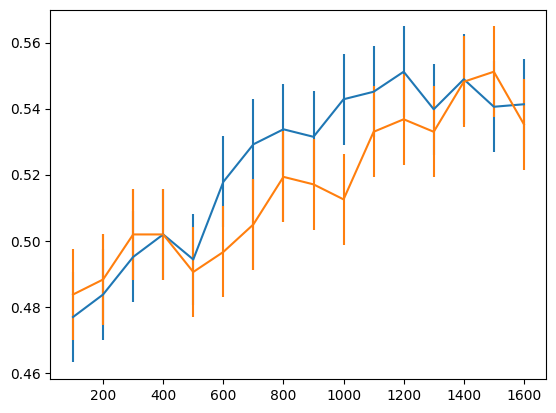

In [9]:
def gsm8k():
    path = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/outputs_gsm8k/results/")
    glob_pattern = "_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = path.glob(glob_pattern)
    task_key = "custom|gsm8k|8"
    show_results(files, task_key)
    print()
    
    glob_pattern = "_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = path.glob(glob_pattern)
    task_key = "custom|gsm8k|8"
    show_results(files, task_key)

def math():
    path = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/outputs_math/results/")
    glob_pattern = "_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = path.glob(glob_pattern)
    task_key = "custom|5|5"
    show_results(files, task_key)

gsm8k()